### Figure 4G Growth Factors Heatmap Generator
- Reads in data from file specified by `INPUT_CSV` and outputs heatmap to destination specified by `OUTPUT_PATH`
- `FIG_SIZE` determines dimension of final plot width, height in inches
- If `FILTER_CPM` is set to true, genes without at least one expression point >= `CPM_CUTOFF` will be filtered out of the final result
- If `RAW_COUNT` is set to true, heatmap will plot raw data values on an axis from 0 to `V_MAX` instead of normalized counts
- Further customization can be achieved by changing parameters for the `sns.clustermap` function according to the [official Seaborn docs](https://seaborn.pydata.org/generated/seaborn.clustermap.html)

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

INPUT_CSV = "raw/growth_factors.csv"
OUTPUT_PATH = "out/growth_factors_hm.pdf"

FIG_SIZE = [8.793, 28.125] 

FILTER_CPM = False # set to true to remove certain genes based on CPM
CPM_CUTOFF = 100

RAW_COUNT = True
V_MAX = 10000 # only used when RAW_COUNT = True

In [17]:
df = pd.read_csv(INPUT_CSV)
df.set_index('Gene', inplace=True)

if (FILTER_CPM):
    df = df.loc[(df['NEUROG2_AVG'] >= CPM_CUTOFF) | (df['NA_AVG'] >= CPM_CUTOFF) | (df['PSC_AVG'] >= CPM_CUTOFF) | (df['NAIP_AVG'] >= CPM_CUTOFF) | (df['CTL_AVG'] >= CPM_CUTOFF)]

display(df)


,NAIP2C_AVG,NEUROG2_AVG,NA_AVG,CTL_AVG,PSC_AVG
Gene,,,,,
FGF13,32054.662180,19148.078100,14800.133050,24946.242980,3249.775936
FGFR1,7465.330316,6537.043521,5093.317356,6183.366366,21911.228350
SPRY1,386.130476,722.030821,136.325547,606.528380,1806.063347
SPRY2,863.591527,855.365490,1170.567890,1686.341578,2202.505882
BDNF,370.469907,207.621458,226.781645,736.322939,343.635504
FGF1,12.722874,18.867483,16.699101,19.441141,25.071424
NGF,12.088087,376.877554,175.806834,113.585717,16.072686
FGF18,1331.399241,840.644185,1198.778434,1765.973061,8.325975
GDNF,1506.199576,65.547478,30.934001,1968.465520,13.409253


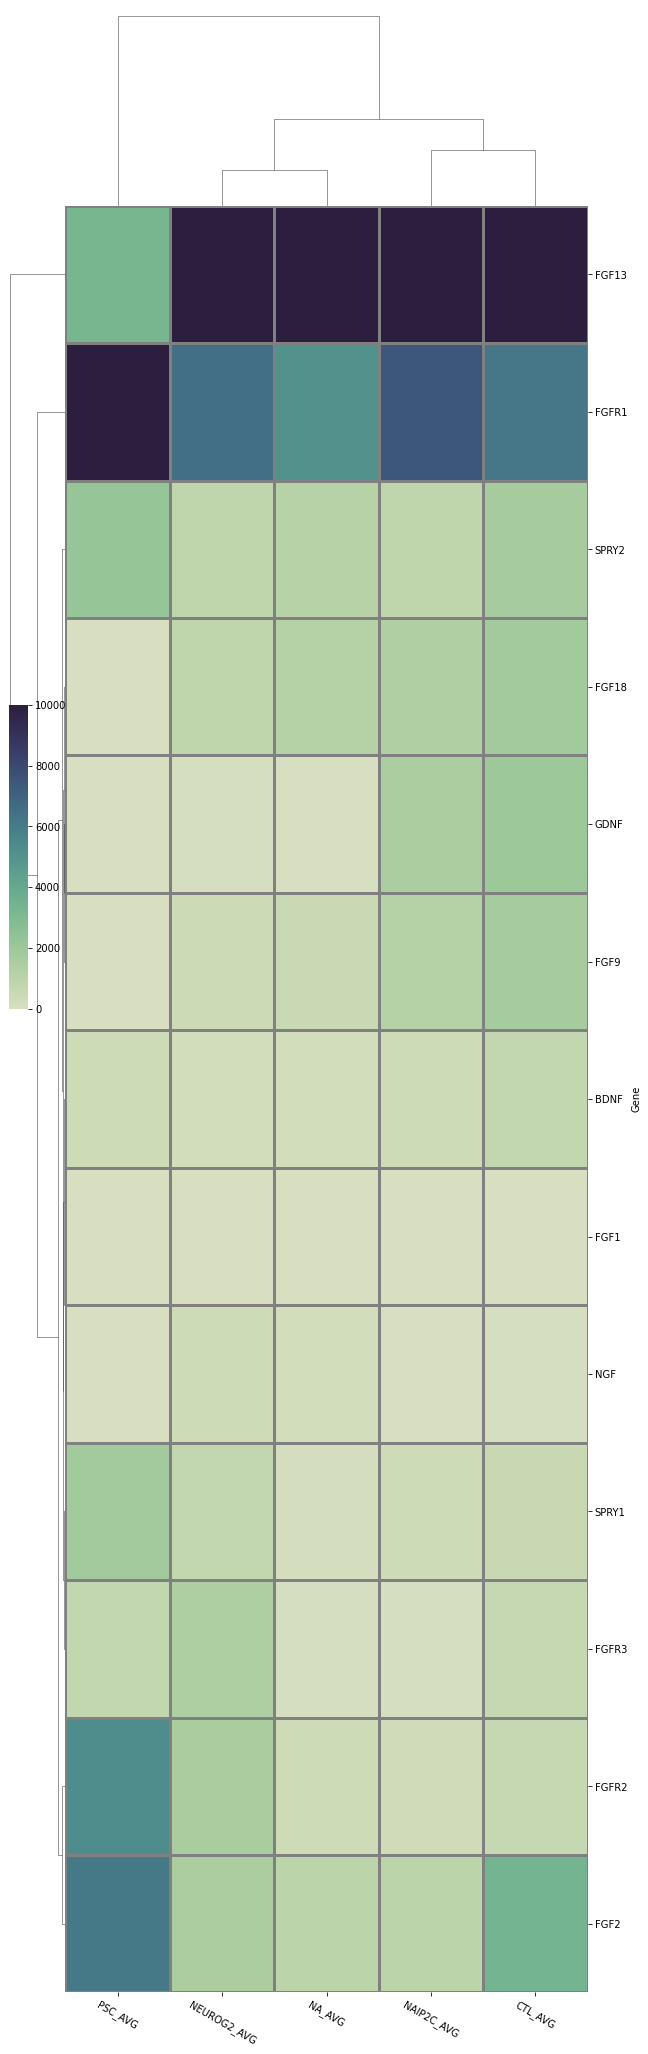

In [18]:
    
if (RAW_COUNT):
    cmap = sns.cubehelix_palette(start=.5, rot=-.75, as_cmap=True) # linear color scheme (better for raw counts)
    heatmap = sns.clustermap(data=df,
               z_score=None,
               colors_ratio=0.01,
               dendrogram_ratio=.1,
               cbar_pos=(.02,.5,.03,.15),
               vmin=0,
               vmax=V_MAX,
               yticklabels=True,
               cmap=cmap,
               linewidths = 3.0,
               linecolor = 'gray',
               row_cluster=True,
               col_cluster=True,
               figsize=(FIG_SIZE[0], FIG_SIZE[1]),
               
    )
else:
    cmap = sns.diverging_palette(150, 275, s=80, l=55) # purple/green diverging color scheme
    heatmap = sns.clustermap(data=df,
                z_score=0,
                colors_ratio=0.01,
                dendrogram_ratio=.1,
                cbar_pos=(.02,.5,.03,.15),
                vmin=-3,
                vmax=3,
                yticklabels=True,
                cmap=cmap,
                linewidths = 3.0,
                linecolor = 'gray',
                row_cluster=True,
                col_cluster=True,
                figsize=(FIG_SIZE[0], FIG_SIZE[1]),
                
    )

plt.setp(heatmap.ax_heatmap.get_yticklabels(), rotation=0)
plt.setp(heatmap.ax_heatmap.get_xticklabels(), rotation=-30)

figure = plt.gcf()
plt.savefig(OUTPUT_PATH, dpi=400)

Written by Manan Chopra @ Wahlin Lab  
Last updated Oct 7 2022